<a href="https://colab.research.google.com/github/AryanChaturvedi/AI-Generated-Fake-Image-detection-/blob/main/Fake_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
os.chdir( '/content/drive/MyDrive/Opencv/GAN/Fake_Image' )

In [ ]:
df = pd.read_csv('train.csv');
image = df.iloc[:, 1:]
label = df.iloc[:,0]

In [ ]:
image.shape

(5250, 1200)

In [ ]:
# Reshape the DataFrame into a 3D NumPy array
image_array = np.array(image).reshape(5250, 20, 20, 3)

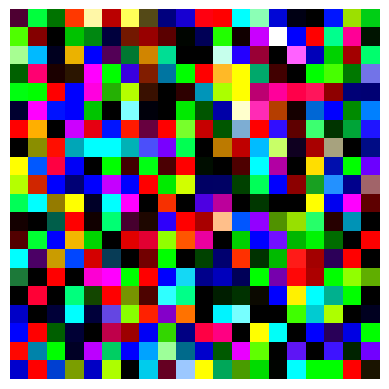

In [ ]:
# Take the first image from the array (you can change the index if needed)
img = image_array[42]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
df.describe()

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,...,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,0.266667,0.385453,0.086769,0.317084,0.400414,0.093063,0.173532,-0.174072,-0.074659,-0.135957,...,0.417874,-0.405061,0.091497,-0.276132,-0.133123,-0.156475,-0.096026,0.372260,-0.222551,0.006532
std,0.442259,0.929075,0.898979,0.969380,0.954504,0.968625,0.895351,1.001566,0.906168,0.972163,...,0.941354,1.054231,0.958970,0.989820,1.042036,1.019384,0.913732,0.944429,0.973640,0.897006
min,0.000000,-3.462941,-3.605773,-4.078232,-3.344323,-3.613712,-3.319666,-3.627701,-3.528635,-4.503662,...,-3.684054,-3.385650,-3.162629,-3.022903,-3.698249,-4.791005,-3.356509,-3.933762,-4.174752,-3.624981
25%,0.000000,-0.286854,-0.470281,-0.379984,-0.290078,-0.644337,-0.392807,-0.980593,-0.677763,-0.914803,...,-0.254776,-1.265848,-0.594289,-1.054700,-1.009256,-0.833164,-0.684567,-0.301254,-1.010557,-0.564394
50%,0.000000,0.598422,0.071867,0.518698,0.653512,0.141549,0.237502,-0.180645,-0.159631,-0.108885,...,0.648944,-0.489479,0.192821,-0.301887,-0.139792,-0.197277,-0.156927,0.612440,-0.241763,-0.008017
75%,1.000000,1.108212,0.609769,1.085552,1.135854,0.950304,0.747622,0.621790,0.450741,0.627055,...,1.131876,0.366639,0.779280,0.409370,0.740059,0.493094,0.434146,1.109200,0.508097,0.552090
max,1.000000,3.439295,3.581171,3.991985,3.900672,3.488667,3.193113,3.062756,3.877255,3.017000,...,4.077517,3.550058,3.790435,3.907684,3.777545,3.269490,3.526907,3.542401,3.642856,3.718869


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Preprocess the data by normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(image)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, label, test_size=0.2, random_state=42)


#### RF feature **selection**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
# create a random forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the data
reg.fit(image, label)

# create a feature selector object
selector = SelectFromModel(reg, prefit=True, threshold='mean')

# transform the data to select the important features
X = selector.transform(image)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)


In [ ]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(combine, lbl, test_size=0.2, random_state=42)


## ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn import neighbors
# initialise with Default parameters
seed = 42
logistic = LogisticRegression()
dt = DecisionTreeClassifier(random_state=seed)
svm = SVC(random_state=seed)
knn = KNeighborsClassifier(n_neighbors=8)
rf = RandomForestClassifier(random_state=seed)
et = ExtraTreesClassifier(random_state=seed)
ada = AdaBoostClassifier(random_state=seed)
gb = GradientBoostingClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
lgb = LGBMClassifier(random_state=seed)

In [ ]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    print(model ,score )
    return (model,score)

In [ ]:

# Get accuracy from all models with Robust Scaling
models = [ logistic,dt,svm,knn,rf,et,ada,gb,xgb,lgb]
for model in models:
  model, accuracy = train_model(model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() 0.8412591864950655
DecisionTreeClassifier(random_state=42) 0.7780479489039873
SVC(random_state=42) 0.840121910317171
KNeighborsClassifier() 0.8804391430602092
RandomForestClassifier(random_state=42) 0.8431585748084873
ExtraTreesClassifier(random_state=42) 0.8420028290193221
AdaBoostClassifier(random_state=42) 0.8489796698787122
GradientBoostingClassifier(random_state=42) 0.8645903598520268
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=Non

#### Ensemble Stack

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base models
estimators = [('knn', knn),
              ('LR',logistic),
              ('dt', dt),
              ('SVC',svm),
              ('xgb', xgb),
              ('rf', rf),
              ('lgb',lgb)]

# Define meta-model
knn =  KNeighborsClassifier(n_neighbors=8)

# Define stacking classifier
clf = StackingClassifier(estimators=estimators, final_estimator=rf)

# Fit the stacking regressor on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

F1-score: 0.8720260905313407


In [ ]:
y_pred = model.predict(test)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Create a DataFrame from the array
df = pd.DataFrame(y_pred, columns=['labels'])

# Add the 'id' column
df['id'] = df.index + 1

# Reorder the columns
df = df[['id', 'labels']]

# Save the DataFrame as a CSV file
df.to_csv('data4.csv', index=False)

#### KNN Neighbors check

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [ ]:
model

KNeighborsClassifier()

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    mean_acc[i-1] = f1_score(y_test, y_pred, average='weighted')

mean_acc

array([0.84970601, 0.85861522, 0.85922938, 0.86967887, 0.86321099,
       0.87211143, 0.87646797, 0.87825008, 0.87538338, 0.87070309,
       0.8673436 , 0.87185742, 0.86887927, 0.86811787, 0.86789591,
       0.86667619, 0.87236241, 0.86846914, 0.87249886, 0.87081026])

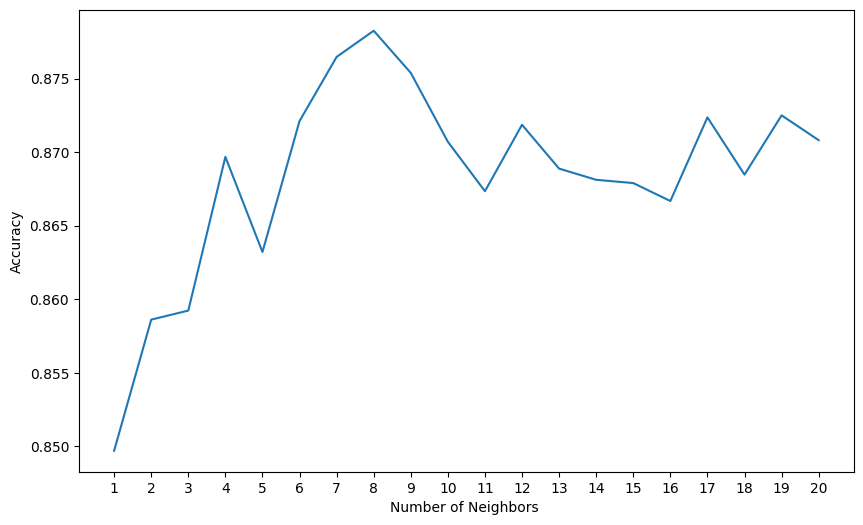

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

#### Grid search for KNN hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [6,7,8,9,10],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
# find the best score
g_res.best_score_

0.876904761904762

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}

In [ ]:
# Train a Logistic Regression model
model = KNeighborsClassifier(n_neighbors=8)
history = model.fit(X_train, y_train)

In [ ]:
# Make predictions on the validation set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8866666666666667
Precision: 0.8902859670824314
Recall: 0.8866666666666667
F1-score: 0.8782500801877408


In [ ]:
test = pd.read_csv('test.csv');

In [ ]:
test = test.iloc[:,1:]

In [ ]:
test = scaler.transform(test)

## MINIGoogleNet

In [ ]:
df = pd.read_csv('train.csv');
image = df.iloc[:, 1:]
label = df.iloc[:,0]
# Preprocess the data by normalizing the features
scaler = MinMaxScaler()
image = scaler.fit_transform(image)
# Reshape the DataFrame into a 3D NumPy array
image_array = np.array(image).reshape(5250, 20, 20, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD

In [ ]:
#! pip install import-ipynb

In [ ]:
import import_ipynb
import Model as md

In [ ]:
# define the total number of epochs to train for along with the # initial learning rate
NUM_EPOCHS = 50
INIT_LR = 0.001

In [ ]:
def poly_decay(epoch):
  # initialize the maximum number of epochs, base learning rate,
  # and power of the polynomial

  maxEpochs = NUM_EPOCHS
  baseLR = INIT_LR
  power = 1.0

  # compute the new learning rate based on polynomial decay
  alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
  # return the new learning rate
  return alpha

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def mini_googlenet(input_shape=(20, 20, 3), num_classes=2):
    # Input layer
    inputs = Input(shape=input_shape)

    # Stage 1
    conv1 = Conv2D(96, (3, 3), padding='same', activation='relu')(inputs)
    conv2 = Conv2D(96, (3, 3), padding='same', activation='relu')(conv1)
    conv3 = Conv2D(96, (3, 3), padding='same', activation='relu')(conv2)

    # Stage 2
    incept1 = concatenate([conv1, conv3])
    conv4 = Conv2D(96, (1, 1), activation='relu')(incept1)
    conv5 = Conv2D(96, (3, 3), padding='same', activation='relu')(conv4)

    # Stage 3
    incept2 = concatenate([conv1, conv5])
    pool1 = MaxPooling2D(pool_size=(2, 2))(incept2)

    # Stage 4
    conv6 = Conv2D(192, (3, 3), padding='same', activation='relu')(pool1)

    # Stage 5
    incept3 = concatenate([conv6, pool1])
    conv7 = Conv2D(192, (1, 1), activation='relu')(incept3)
    conv8 = Conv2D(192, (3, 3), padding='same', activation='relu')(conv7)

    # Stage 6
    incept4 = concatenate([conv6, conv8])
    pool2 = MaxPooling2D(pool_size=(2, 2))(incept4)

    # Stage 7
    conv9 = Conv2D(192, (3, 3), padding='same', activation='relu')(pool2)

    # Stage 8
    incept5 = concatenate([conv9, pool2])
    conv10 = Conv2D(192, (1, 1), activation='relu')(incept5)
    conv11 = Conv2D(192, (3, 3), padding='same', activation='relu')(conv10)

    # Stage 9
    incept6 = concatenate([conv9, conv11])
    pool3 = AveragePooling2D(pool_size=(2, 2))(incept6)

    # Flatten and fully-connected layers
    flatten = Flatten()(pool3)
    dense1 = Dense(256, activation='relu')(flatten)
    dense2 = Dense(num_classes, activation='softmax')(dense1)

    # Create the model
    model = Model(inputs=inputs, outputs=dense2)

    return model


In [ ]:
opt = SGD(lr=INIT_LR, momentum=0.9)
model = mini_googlenet(input_shape=(20, 20, 3), num_classes=2)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
# Early stoping
import tensorflow as tf
earlystop = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                min_delta=0.00001,
                patience= 10,
                verbose=0,
                mode='auto',
                baseline=None,
                restore_best_weights=False,

)

In [ ]:
callbacks = [LearningRateScheduler(poly_decay),earlystop]

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(width_shift_range=0.1,
                         height_shift_range=0.1,
                         horizontal_flip=True,
                         fill_mode="nearest")

In [ ]:
# Split the data into training and validation sets
trainX,testX, trainY,  testY = train_test_split(image_array, label, test_size=0.2, random_state=42)


In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
# train the network
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=64),
                    validation_data=(testX, testY),
                    steps_per_epoch=len(trainX) // 64,
                    epochs=NUM_EPOCHS,
                    callbacks=callbacks,
                    verbose=1
                    )

Epoch 1/50


<ipython-input-173-4b4cb5337fd2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=64),


65/65 [==============================] - 4s 46ms/step - loss: 0.6206 - accuracy: 0.6828 - val_loss: 0.5695 - val_accuracy: 0.7438 - lr: 0.0010
Epoch 2/50
65/65 [==============================] - 3s 47ms/step - loss: 0.5825 - accuracy: 0.7307 - val_loss: 0.5691 - val_accuracy: 0.7438 - lr: 9.8000e-04
Epoch 3/50
65/65 [==============================] - 2s 36ms/step - loss: 0.5829 - accuracy: 0.7304 - val_loss: 0.5690 - val_accuracy: 0.7438 - lr: 9.6000e-04
Epoch 4/50
65/65 [==============================] - 2s 34ms/step - loss: 0.5842 - accuracy: 0.7290 - val_loss: 0.5692 - val_accuracy: 0.7438 - lr: 9.4000e-04
Epoch 5/50
65/65 [==============================] - 2s 36ms/step - loss: 0.5822 - accuracy: 0.7314 - val_loss: 0.5695 - val_accuracy: 0.7438 - lr: 9.2000e-04
Epoch 6/50
65/65 [==============================] - 2s 38ms/step - loss: 0.5820 - accuracy: 0.7311 - val_loss: 0.5688 - val_accuracy: 0.7438 - lr: 9.0000e-04
Epoch 7/50
65/65 [==============================] - 4s 58ms/step - 

In [ ]:
from sklearn.metrics import classification_report, f1_score

# Convert predictions to labels
predictions_labels = predictions.argmax(axis=1)
testY_labels = testY.argmax(axis=1)

# Compute classification report
print(classification_report(testY_labels, predictions_labels))

# Compute F1 score
print("F1 Score: ", f1_score(testY_labels, predictions_labels, average='weighted'))


              precision    recall  f1-score   support

           0       0.86      0.96      0.91       781
           1       0.83      0.54      0.66       269

    accuracy                           0.85      1050
   macro avg       0.84      0.75      0.78      1050
weighted avg       0.85      0.85      0.84      1050

F1 Score:  0.8431534772298545


In [ ]:
n_epochs = len(H.history['loss'])

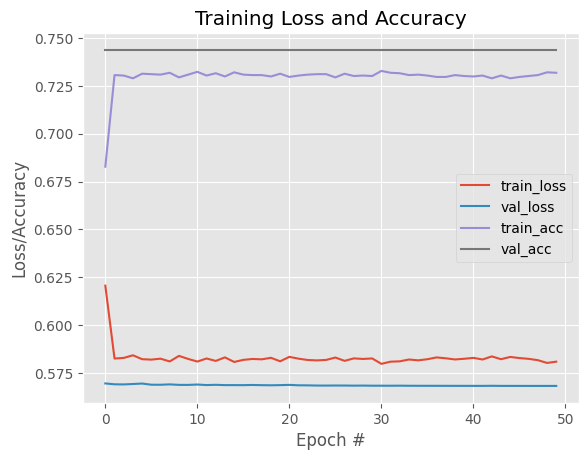

In [ ]:
# plot the training loss and accuracy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), H.history['accuracy'], label="train_acc")
plt.plot(np.arange(0, n_epochs), H.history['val_accuracy'], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## StylGAN

In [ ]:
import tensorflow as tf

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir( '/content/drive/MyDrive/Opencv/GAN/Fake_Image' )

In [ ]:
df = pd.read_csv('train.csv');
image = df.iloc[:, 1:]
label = df.iloc[:,0]
# Reshape the DataFrame into a 3D NumPy array
image_array = np.array(image).reshape(5250, 20, 20, 3)

In [ ]:
import tensorflow as tf

# Assuming you have the image array stored in the variable 'image_array'
dataset = tf.data.Dataset.from_tensor_slices(image_array)
dataset = dataset.map(lambda x: tf.expand_dims(x, axis=0))


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(5*5*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((5, 5, 256)))
    assert model.output_shape == (None, 5, 5, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 10, 10, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 20, 20, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 20, 20, 3)

    return model


1/1 [==============================] - 0s 226ms/step


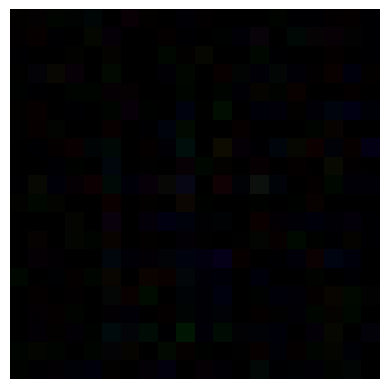

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator.predict(noise)
plt.imshow(generated_image[0, :, :, :])
plt.axis('off')
plt.show()


In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[20, 20, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model


In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00107488]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
#@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.show()

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

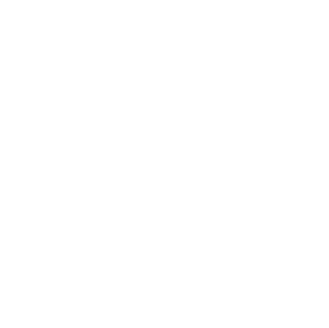

Time for epoch 4 is 562.5078134536743 sec


In [ ]:
train(dataset, EPOCHS)

## DCGAN

In [ ]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
from torchvision.utils import make_grid
def show_tensor_images(image_tensor, num_images=25, size=(3, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    #image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_unflat[:1])
    plt.show()

In [ ]:
##########################
### SETTINGS
##########################

# Device

DEVICE = torch.device(f'cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', DEVICE)

# Hyperparameters
RANDOM_SEED = 42
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

NUM_EPOCHS = 100
BATCH_SIZE = 128

IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 20, 20, 3

Device: cuda


In [ ]:
class DCGAN(torch.nn.Module):
    def __init__(
        self,
        latent_dim=100,
        num_feat_maps_gen=8,
        num_feat_maps_dis=8,
        color_channels=3,
    ):
        super().__init__()

        self.generator = nn.Sequential(
            nn.ConvTranspose2d(
                latent_dim,
                num_feat_maps_gen * 4,
                kernel_size=4,
                stride=1,
                padding=0,
                bias=False,
            ),
            nn.BatchNorm2d(num_feat_maps_gen * 4),
            nn.LeakyReLU(inplace=True),
            nn.ConvTranspose2d(
                num_feat_maps_gen * 4,
                num_feat_maps_gen * 2,
                kernel_size=3,
                stride=2,
                padding=1,
                bias=False,
            ),
            nn.BatchNorm2d(num_feat_maps_gen * 2),
            nn.LeakyReLU(inplace=True),
            nn.ConvTranspose2d(
                num_feat_maps_gen * 2,
                num_feat_maps_gen,
                kernel_size=3,
                stride=2,
                padding=1,
                bias=False,
            ),
            nn.BatchNorm2d(num_feat_maps_gen),
            nn.LeakyReLU(inplace=True),
            nn.ConvTranspose2d(
                num_feat_maps_gen,
                color_channels,
                kernel_size=3,
                stride=2,
                padding=1,
                output_padding=1,
                bias=False,
            ),
            nn.Tanh(),
        )

        self.discriminator = nn.Sequential(
            nn.Conv2d(
                color_channels,
                num_feat_maps_dis,
                kernel_size=3,
                stride=2,
                padding=1,
            ),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(
                num_feat_maps_dis,
                num_feat_maps_dis * 2,
                kernel_size=3,
                stride=2,
                padding=1,
                bias=False,
            ),
            nn.BatchNorm2d(num_feat_maps_dis * 2),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(
                num_feat_maps_dis * 2,
                num_feat_maps_dis * 4,
                kernel_size=3,
                stride=2,
                padding=1,
                bias=False,
            ),
            nn.BatchNorm2d(num_feat_maps_dis * 4),
            nn.LeakyReLU(inplace=True),
            nn.Conv2d(
                num_feat_maps_dis * 4,
                1,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.Flatten(),
        )

    def generator_forward(self, z):
        img = self.generator(z)
        return img

    def discriminator_forward(self, img):
        logits = self.discriminator(img)
        return logits


In [ ]:
df = pd.read_csv('test.csv');

In [ ]:
df = df[df['labels']==1]

In [ ]:
image = df.iloc[:, 1:]
#label = df.iloc[:,0]

In [ ]:
# Preprocess the data by normalizing the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
image_norm = scaler.fit_transform(image)

In [ ]:
image_norm.shape

(2250, 1200)

In [ ]:
# Reshape the DataFrame into a 3D NumPy array
image_array = np.array(image_norm).reshape(2250, 20, 20, 3)

In [ ]:
image_array.shape

(1400, 20, 20, 3)

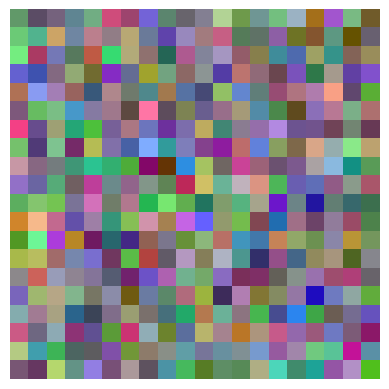

In [ ]:
# Take the first image from the array (you can change the index if needed)
img = image_array[42]

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torchvision.transforms import transforms

In [ ]:
def create_dataset(image_array):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Convert image array to float32
    image_array = image_array.astype('float32')

    # Normalize the image array
    normalized_images = []
    for image in image_array:
        normalized_image = transform(image)
        normalized_images.append(normalized_image)

    # Stack the normalized images into a single tensor
    normalized_images = torch.stack(normalized_images)
        # Reshape the tensor to match the new dimensions
   # normalized_images = normalized_images.permute(0, 3, 1, 2)

    return TensorDataset(normalized_images)

# Example usage  # Replace with your image array of shape (20, 20, 3)
dataset = create_dataset(image_array)

In [ ]:
batch_size = 16

In [ ]:
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
class GAN(torch.nn.Module):

    def __init__(self, latent_dim=100, image_height=20, image_width=20, color_channels=3):
        super().__init__()

        self.image_height = image_height
        self.image_width = image_width
        self.color_channels = color_channels

        self.generator = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, image_height * image_width * color_channels),
            nn.Tanh()
        )

        self.discriminator = nn.Sequential(
            nn.Flatten(),
            nn.Linear(image_height * image_width * color_channels, 128),
            nn.LeakyReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(128, 1),  # outputs logits
            # nn.Sigmoid()
        )

    def generator_forward(self, z):
        z = torch.flatten(z, start_dim=1)
        img = self.generator(z)
        img = img.view(z.size(0), self.color_channels, self.image_height, self.image_width)
        return img

    def discriminator_forward(self, img):
        logits = self.discriminator(img)
        return logits


In [ ]:
#model = DCGAN()
model = GAN()
model.to(DEVICE)


optim_gen = torch.optim.Adam(model.generator.parameters(),
                             betas=(0.5, 0.999),
                             lr=GENERATOR_LEARNING_RATE)

optim_discr = torch.optim.Adam(model.discriminator.parameters(),
                               betas=(0.5, 0.999),
                               lr=DISCRIMINATOR_LEARNING_RATE)

In [ ]:
import time
import torch
import torch.nn.functional as F
import torchvision
import torch.autograd

In [ ]:
def train_gan_v1(num_epochs, model, optimizer_gen, optimizer_discr,
                 latent_dim, device, train_loader, loss_fn=None,
                 logging_interval=100,
                 save_model=None):

    log_dict = {'train_generator_loss_per_batch': [],
                'train_discriminator_loss_per_batch': [],
                'train_discriminator_real_acc_per_batch': [],
                'train_discriminator_fake_acc_per_batch': [],
                'images_from_noise_per_epoch': []}
    cur_step = 0
    mean_generator_loss = 0
    mean_discriminator_loss = 0
    display_step = 2000

    if loss_fn is None:
        loss_fn = torch.nn.BCEWithLogitsLoss()

    # Batch of latent (noise) vectors for
    # evaluating / visualizing the training progress
    # of the generator
    fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device) # format NCHW

    start_time = time.time()
    for epoch in range(num_epochs):

        model.train()
        for batch_idx, features in enumerate(train_loader):

            # real images
            real_images = features[0].to(device)
            batch_size = len(real_images)
            real_labels = torch.ones(batch_size, device=device) # real label = 1


            # generated (fake) images
            noise = torch.randn(batch_size, latent_dim, 1, 1, device=device)  # format NCHW
            fake_images = model.generator_forward(noise)



            # --------------------------
            # Train Discriminator
            # --------------------------

            optimizer_discr.zero_grad()

            # get discriminator loss on real images
            discr_pred_real = model.discriminator_forward(real_images).view(-1) # Nx1 -> N
            real_loss = loss_fn(discr_pred_real, real_labels)
            # real_loss.backward()

            # get discriminator loss on fake images
            discr_pred_fake = model.discriminator_forward(fake_images.detach()).view(-1)
            fake_labels = torch.zeros(discr_pred_fake.size(), device=device) # fake label = 0
            fake_loss = loss_fn(discr_pred_fake, fake_labels)
            # fake_loss.backward()
            flipped_fake_labels = torch.ones_like(discr_pred_fake)  # fake label = 1# here, fake label = 1
            # combined loss
            discr_loss = 0.5*(real_loss + fake_loss)

            # Keep track of the average discriminator loss
            mean_discriminator_loss += discr_loss.item() / display_step
            discr_loss.backward()

            optimizer_discr.step()

            # --------------------------
            # Train Generator
            # --------------------------

            optimizer_gen.zero_grad()

            # get discriminator loss on fake images with flipped labels
            discr_pred_fake = model.discriminator_forward(fake_images).view(-1)
            gener_loss = loss_fn(discr_pred_fake, flipped_fake_labels)
            gener_loss.backward()

            optimizer_gen.step()
            # Keep track of the average generator loss
            mean_generator_loss += gener_loss.item() / display_step

            # --------------------------
            # Logging
            # --------------------------
            log_dict['train_generator_loss_per_batch'].append(gener_loss.item())
            log_dict['train_discriminator_loss_per_batch'].append(discr_loss.item())

            predicted_labels_real = torch.where(discr_pred_real.detach() > 0., 1., 0.)
            predicted_labels_fake = torch.where(discr_pred_fake.detach() > 0., 1., 0.)
            acc_real = (predicted_labels_real == real_labels).float().mean()*100.
            acc_fake = (predicted_labels_fake == fake_labels).float().mean()*100.
            log_dict['train_discriminator_real_acc_per_batch'].append(acc_real.item())
            log_dict['train_discriminator_fake_acc_per_batch'].append(acc_fake.item())

            if not batch_idx % logging_interval:
                print('Epoch: %03d/%03d | Batch %03d/%03d | Gen/Dis Loss: %.4f/%.4f'
                       % (epoch+1, num_epochs, batch_idx,
                          len(train_loader), gener_loss.item(), discr_loss.item()))

            ## Visualization code ##
            if cur_step % display_step == 0 and cur_step > 0:
                print(f"Step {cur_step}: Generator loss: {mean_generator_loss}, discriminator loss: {mean_discriminator_loss}")
                fake_image = fake_images.detach().cpu()[0]
                plt.imshow(fake_image.permute(1, 2, 0))
                plt.axis('off')
                plt.show()
                real_images = real_images.detach().cpu()[0]
                plt.imshow(real_images.permute(1, 2, 0))
                plt.axis('off')
                plt.show()
                mean_generator_loss = 0
                mean_discriminator_loss = 0
            cur_step += 1


        ### Save images for evaluation
        with torch.no_grad():
            fake_images = model.generator_forward(fixed_noise).detach().cpu()
            log_dict['images_from_noise_per_epoch'].append(
                torchvision.utils.make_grid(fake_images, padding=2, normalize=True))


        print('Time elapsed: %.2f min' % ((time.time() - start_time)/60))

    print('Total Training Time: %.2f min' % ((time.time() - start_time)/60))

    if save_model is not None:
        torch.save(model.state_dict(), save_model)

    return log_dict

In [ ]:
# Hyperparameters
RANDOM_SEED = 42
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

NUM_EPOCHS = 200
BATCH_SIZE = 64

Epoch: 001/200 | Batch 000/088 | Gen/Dis Loss: 0.9727/0.7157
Time elapsed: 0.01 min
Epoch: 002/200 | Batch 000/088 | Gen/Dis Loss: 1.1438/0.5240
Time elapsed: 0.01 min
Epoch: 003/200 | Batch 000/088 | Gen/Dis Loss: 1.2974/0.4992
Time elapsed: 0.02 min
Epoch: 004/200 | Batch 000/088 | Gen/Dis Loss: 1.1028/0.5664
Time elapsed: 0.03 min
Epoch: 005/200 | Batch 000/088 | Gen/Dis Loss: 1.3319/0.5100
Time elapsed: 0.03 min
Epoch: 006/200 | Batch 000/088 | Gen/Dis Loss: 1.2127/0.4511
Time elapsed: 0.04 min
Epoch: 007/200 | Batch 000/088 | Gen/Dis Loss: 1.1348/0.5991
Time elapsed: 0.05 min
Epoch: 008/200 | Batch 000/088 | Gen/Dis Loss: 1.0699/0.5339
Time elapsed: 0.05 min
Epoch: 009/200 | Batch 000/088 | Gen/Dis Loss: 1.2223/0.4961
Time elapsed: 0.06 min
Epoch: 010/200 | Batch 000/088 | Gen/Dis Loss: 1.0207/0.5930
Time elapsed: 0.07 min
Epoch: 011/200 | Batch 000/088 | Gen/Dis Loss: 1.1215/0.3948
Time elapsed: 0.08 min
Epoch: 012/200 | Batch 000/088 | Gen/Dis Loss: 1.1836/0.5246
Time elapsed: 0

Step 2000: Generator loss: 1.1151196569204342, discriminator loss: 0.5258592028319838


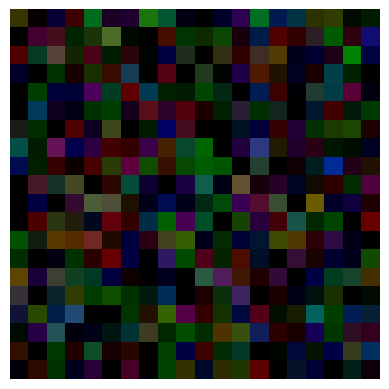

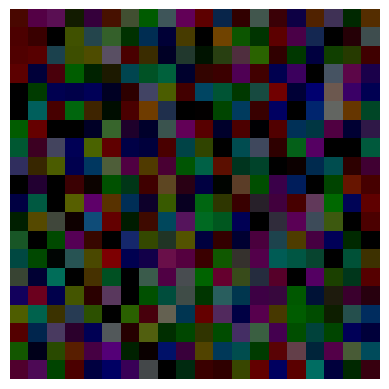

Time elapsed: 0.17 min
Epoch: 024/200 | Batch 000/088 | Gen/Dis Loss: 1.2436/0.4340
Time elapsed: 0.18 min
Epoch: 025/200 | Batch 000/088 | Gen/Dis Loss: 1.2272/0.4940
Time elapsed: 0.18 min
Epoch: 026/200 | Batch 000/088 | Gen/Dis Loss: 1.0811/0.6258
Time elapsed: 0.19 min
Epoch: 027/200 | Batch 000/088 | Gen/Dis Loss: 1.1527/0.5407
Time elapsed: 0.20 min
Epoch: 028/200 | Batch 000/088 | Gen/Dis Loss: 1.3422/0.5883
Time elapsed: 0.20 min
Epoch: 029/200 | Batch 000/088 | Gen/Dis Loss: 0.9125/0.4709
Time elapsed: 0.21 min
Epoch: 030/200 | Batch 000/088 | Gen/Dis Loss: 1.1709/0.5349
Time elapsed: 0.22 min
Epoch: 031/200 | Batch 000/088 | Gen/Dis Loss: 1.1663/0.5117
Time elapsed: 0.22 min
Epoch: 032/200 | Batch 000/088 | Gen/Dis Loss: 1.0491/0.3679
Time elapsed: 0.23 min
Epoch: 033/200 | Batch 000/088 | Gen/Dis Loss: 0.9157/0.5088
Time elapsed: 0.24 min
Epoch: 034/200 | Batch 000/088 | Gen/Dis Loss: 1.2515/0.5113
Time elapsed: 0.24 min
Epoch: 035/200 | Batch 000/088 | Gen/Dis Loss: 1.1499

Step 4000: Generator loss: 1.124753003567457, discriminator loss: 0.5214369853734973


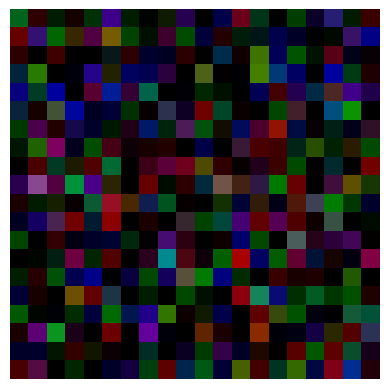

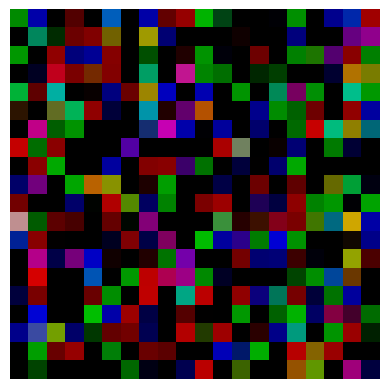

Time elapsed: 0.35 min
Epoch: 047/200 | Batch 000/088 | Gen/Dis Loss: 1.2350/0.4473
Time elapsed: 0.36 min
Epoch: 048/200 | Batch 000/088 | Gen/Dis Loss: 1.1507/0.4809
Time elapsed: 0.36 min
Epoch: 049/200 | Batch 000/088 | Gen/Dis Loss: 1.0998/0.5314
Time elapsed: 0.37 min
Epoch: 050/200 | Batch 000/088 | Gen/Dis Loss: 1.0986/0.4615
Time elapsed: 0.38 min
Epoch: 051/200 | Batch 000/088 | Gen/Dis Loss: 1.0707/0.4501
Time elapsed: 0.38 min
Epoch: 052/200 | Batch 000/088 | Gen/Dis Loss: 1.0848/0.5057
Time elapsed: 0.39 min
Epoch: 053/200 | Batch 000/088 | Gen/Dis Loss: 1.1437/0.5080
Time elapsed: 0.40 min
Epoch: 054/200 | Batch 000/088 | Gen/Dis Loss: 1.0875/0.5193
Time elapsed: 0.40 min
Epoch: 055/200 | Batch 000/088 | Gen/Dis Loss: 0.9800/0.5580
Time elapsed: 0.41 min
Epoch: 056/200 | Batch 000/088 | Gen/Dis Loss: 1.1472/0.5960
Time elapsed: 0.42 min
Epoch: 057/200 | Batch 000/088 | Gen/Dis Loss: 1.4778/0.4916
Time elapsed: 0.42 min
Epoch: 058/200 | Batch 000/088 | Gen/Dis Loss: 1.4570

Time elapsed: 0.50 min
Epoch: 069/200 | Batch 000/088 | Gen/Dis Loss: 1.1170/0.4844
Step 6000: Generator loss: 1.1469603632390495, discriminator loss: 0.5212183682173498


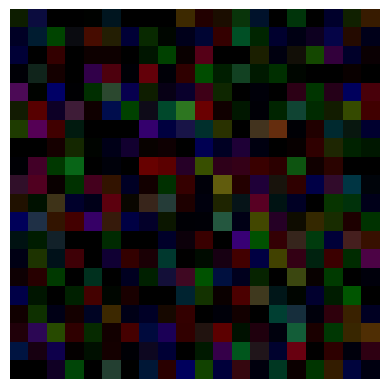

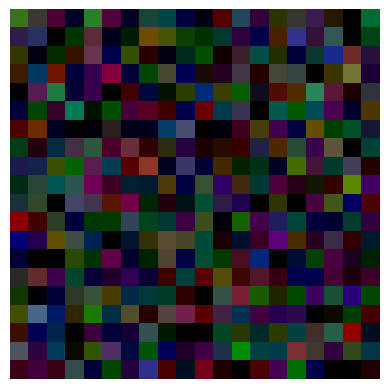

Time elapsed: 0.51 min
Epoch: 070/200 | Batch 000/088 | Gen/Dis Loss: 1.2166/0.5169
Time elapsed: 0.51 min
Epoch: 071/200 | Batch 000/088 | Gen/Dis Loss: 1.0274/0.5164
Time elapsed: 0.52 min
Epoch: 072/200 | Batch 000/088 | Gen/Dis Loss: 1.4020/0.4755
Time elapsed: 0.53 min
Epoch: 073/200 | Batch 000/088 | Gen/Dis Loss: 1.3156/0.5281
Time elapsed: 0.54 min
Epoch: 074/200 | Batch 000/088 | Gen/Dis Loss: 1.1503/0.4779
Time elapsed: 0.55 min
Epoch: 075/200 | Batch 000/088 | Gen/Dis Loss: 1.1959/0.4948
Time elapsed: 0.56 min
Epoch: 076/200 | Batch 000/088 | Gen/Dis Loss: 0.9755/0.6346
Time elapsed: 0.56 min
Epoch: 077/200 | Batch 000/088 | Gen/Dis Loss: 1.1688/0.4798
Time elapsed: 0.57 min
Epoch: 078/200 | Batch 000/088 | Gen/Dis Loss: 1.4272/0.3503
Time elapsed: 0.58 min
Epoch: 079/200 | Batch 000/088 | Gen/Dis Loss: 1.1219/0.4970
Time elapsed: 0.59 min
Epoch: 080/200 | Batch 000/088 | Gen/Dis Loss: 1.1950/0.4512
Time elapsed: 0.59 min
Epoch: 081/200 | Batch 000/088 | Gen/Dis Loss: 0.9442

Step 8000: Generator loss: 1.152069377720352, discriminator loss: 0.5109243502467861


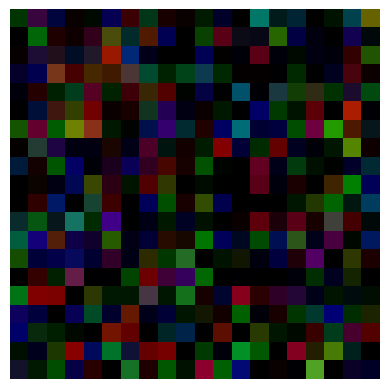

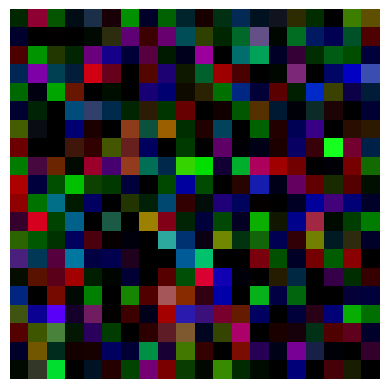

Time elapsed: 0.67 min
Epoch: 092/200 | Batch 000/088 | Gen/Dis Loss: 1.0990/0.6296
Time elapsed: 0.68 min
Epoch: 093/200 | Batch 000/088 | Gen/Dis Loss: 1.5483/0.4999
Time elapsed: 0.68 min
Epoch: 094/200 | Batch 000/088 | Gen/Dis Loss: 1.1479/0.4231
Time elapsed: 0.69 min
Epoch: 095/200 | Batch 000/088 | Gen/Dis Loss: 1.1118/0.5310
Time elapsed: 0.70 min
Epoch: 096/200 | Batch 000/088 | Gen/Dis Loss: 1.1983/0.5216
Time elapsed: 0.70 min
Epoch: 097/200 | Batch 000/088 | Gen/Dis Loss: 1.0938/0.4353
Time elapsed: 0.71 min
Epoch: 098/200 | Batch 000/088 | Gen/Dis Loss: 1.2358/0.6317
Time elapsed: 0.72 min
Epoch: 099/200 | Batch 000/088 | Gen/Dis Loss: 1.1930/0.5264
Time elapsed: 0.72 min
Epoch: 100/200 | Batch 000/088 | Gen/Dis Loss: 1.2801/0.4634
Time elapsed: 0.73 min
Epoch: 101/200 | Batch 000/088 | Gen/Dis Loss: 1.2016/0.4346
Time elapsed: 0.74 min
Epoch: 102/200 | Batch 000/088 | Gen/Dis Loss: 1.1299/0.5965
Time elapsed: 0.75 min
Epoch: 103/200 | Batch 000/088 | Gen/Dis Loss: 1.2041

Step 10000: Generator loss: 1.1776454504132283, discriminator loss: 0.5056980411708358


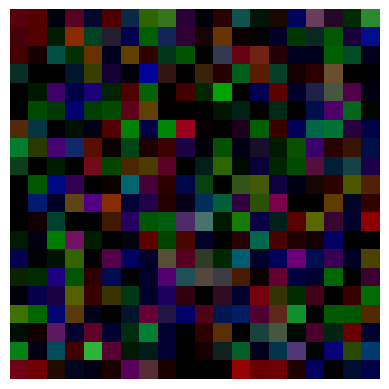

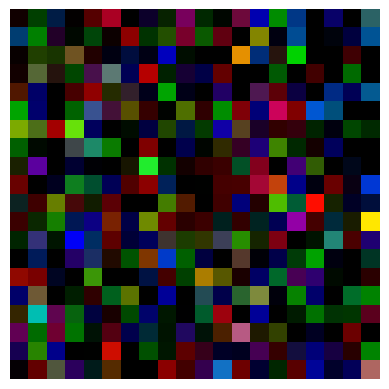

Time elapsed: 0.84 min
Epoch: 115/200 | Batch 000/088 | Gen/Dis Loss: 1.2056/0.4115
Time elapsed: 0.85 min
Epoch: 116/200 | Batch 000/088 | Gen/Dis Loss: 1.1597/0.5475
Time elapsed: 0.85 min
Epoch: 117/200 | Batch 000/088 | Gen/Dis Loss: 1.0114/0.3148
Time elapsed: 0.86 min
Epoch: 118/200 | Batch 000/088 | Gen/Dis Loss: 1.0323/0.4943
Time elapsed: 0.87 min
Epoch: 119/200 | Batch 000/088 | Gen/Dis Loss: 1.2336/0.5345
Time elapsed: 0.87 min
Epoch: 120/200 | Batch 000/088 | Gen/Dis Loss: 1.1900/0.5657
Time elapsed: 0.88 min
Epoch: 121/200 | Batch 000/088 | Gen/Dis Loss: 1.3200/0.4409
Time elapsed: 0.89 min
Epoch: 122/200 | Batch 000/088 | Gen/Dis Loss: 1.3367/0.4256
Time elapsed: 0.89 min
Epoch: 123/200 | Batch 000/088 | Gen/Dis Loss: 1.2028/0.4436
Time elapsed: 0.90 min
Epoch: 124/200 | Batch 000/088 | Gen/Dis Loss: 1.4112/0.4245
Time elapsed: 0.91 min
Epoch: 125/200 | Batch 000/088 | Gen/Dis Loss: 1.1300/0.3281
Time elapsed: 0.91 min
Epoch: 126/200 | Batch 000/088 | Gen/Dis Loss: 1.1738

Step 12000: Generator loss: 1.1881404715478419, discriminator loss: 0.5078704866617919


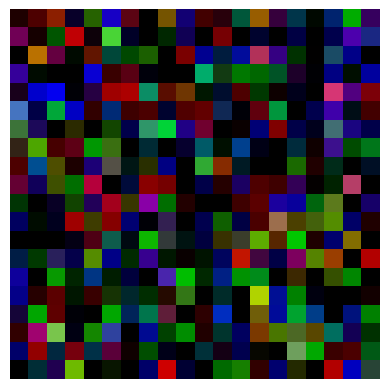

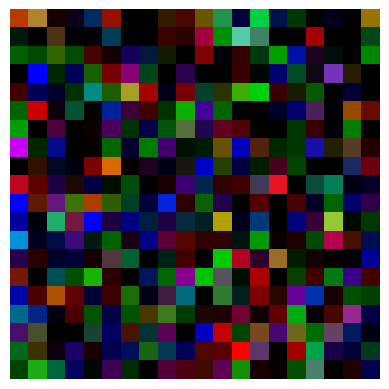

Time elapsed: 1.01 min
Epoch: 138/200 | Batch 000/088 | Gen/Dis Loss: 0.8575/0.5806
Time elapsed: 1.02 min
Epoch: 139/200 | Batch 000/088 | Gen/Dis Loss: 1.2873/0.6322
Time elapsed: 1.03 min
Epoch: 140/200 | Batch 000/088 | Gen/Dis Loss: 1.1278/0.6863
Time elapsed: 1.03 min
Epoch: 141/200 | Batch 000/088 | Gen/Dis Loss: 1.0644/0.4925
Time elapsed: 1.04 min
Epoch: 142/200 | Batch 000/088 | Gen/Dis Loss: 1.0311/0.4798
Time elapsed: 1.05 min
Epoch: 143/200 | Batch 000/088 | Gen/Dis Loss: 1.2660/0.5336
Time elapsed: 1.05 min
Epoch: 144/200 | Batch 000/088 | Gen/Dis Loss: 1.1446/0.4178
Time elapsed: 1.06 min
Epoch: 145/200 | Batch 000/088 | Gen/Dis Loss: 1.1795/0.4219
Time elapsed: 1.07 min
Epoch: 146/200 | Batch 000/088 | Gen/Dis Loss: 1.2757/0.4321
Time elapsed: 1.07 min
Epoch: 147/200 | Batch 000/088 | Gen/Dis Loss: 1.1131/0.4671
Time elapsed: 1.08 min
Epoch: 148/200 | Batch 000/088 | Gen/Dis Loss: 1.2133/0.5168
Time elapsed: 1.09 min
Epoch: 149/200 | Batch 000/088 | Gen/Dis Loss: 1.1051

Time elapsed: 1.16 min
Epoch: 160/200 | Batch 000/088 | Gen/Dis Loss: 1.2788/0.4003
Step 14000: Generator loss: 1.2063900748193255, discriminator loss: 0.5033746944963934


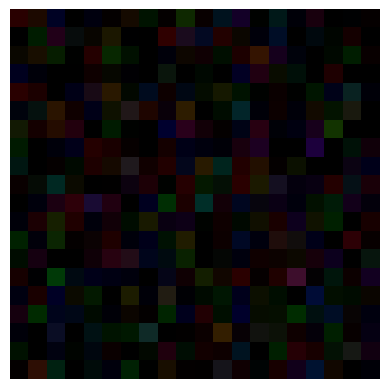

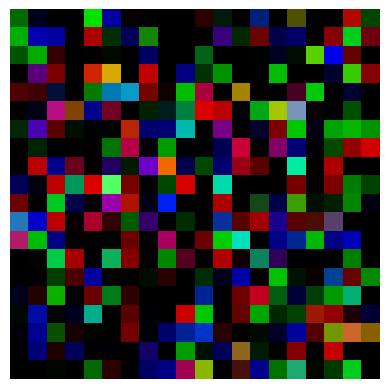

Time elapsed: 1.17 min
Epoch: 161/200 | Batch 000/088 | Gen/Dis Loss: 1.3281/0.5965
Time elapsed: 1.18 min
Epoch: 162/200 | Batch 000/088 | Gen/Dis Loss: 1.6063/0.3826
Time elapsed: 1.19 min
Epoch: 163/200 | Batch 000/088 | Gen/Dis Loss: 1.0749/0.6262
Time elapsed: 1.19 min
Epoch: 164/200 | Batch 000/088 | Gen/Dis Loss: 1.2051/0.5226
Time elapsed: 1.20 min
Epoch: 165/200 | Batch 000/088 | Gen/Dis Loss: 1.3260/0.3682
Time elapsed: 1.21 min
Epoch: 166/200 | Batch 000/088 | Gen/Dis Loss: 1.3140/0.4923
Time elapsed: 1.22 min
Epoch: 167/200 | Batch 000/088 | Gen/Dis Loss: 1.2519/0.5909
Time elapsed: 1.23 min
Epoch: 168/200 | Batch 000/088 | Gen/Dis Loss: 1.3502/0.3699
Time elapsed: 1.24 min
Epoch: 169/200 | Batch 000/088 | Gen/Dis Loss: 1.2285/0.5830
Time elapsed: 1.24 min
Epoch: 170/200 | Batch 000/088 | Gen/Dis Loss: 1.3775/0.3728
Time elapsed: 1.25 min
Epoch: 171/200 | Batch 000/088 | Gen/Dis Loss: 1.1223/0.3998
Time elapsed: 1.26 min
Epoch: 172/200 | Batch 000/088 | Gen/Dis Loss: 1.4131

Step 16000: Generator loss: 1.2424403089284917, discriminator loss: 0.49567755769193195


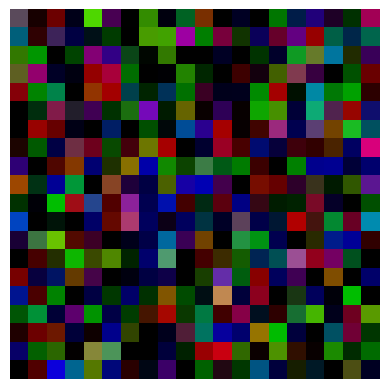

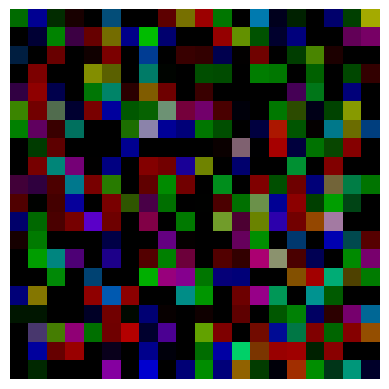

Time elapsed: 1.34 min
Epoch: 183/200 | Batch 000/088 | Gen/Dis Loss: 1.2904/0.3884
Time elapsed: 1.34 min
Epoch: 184/200 | Batch 000/088 | Gen/Dis Loss: 1.3702/0.5074
Time elapsed: 1.35 min
Epoch: 185/200 | Batch 000/088 | Gen/Dis Loss: 1.1991/0.6070
Time elapsed: 1.36 min
Epoch: 186/200 | Batch 000/088 | Gen/Dis Loss: 1.3580/0.4829
Time elapsed: 1.36 min
Epoch: 187/200 | Batch 000/088 | Gen/Dis Loss: 1.3991/0.4537
Time elapsed: 1.37 min
Epoch: 188/200 | Batch 000/088 | Gen/Dis Loss: 1.3211/0.5439
Time elapsed: 1.38 min
Epoch: 189/200 | Batch 000/088 | Gen/Dis Loss: 1.1975/0.4207
Time elapsed: 1.39 min
Epoch: 190/200 | Batch 000/088 | Gen/Dis Loss: 1.2425/0.4654
Time elapsed: 1.39 min
Epoch: 191/200 | Batch 000/088 | Gen/Dis Loss: 1.1379/0.4428
Time elapsed: 1.40 min
Epoch: 192/200 | Batch 000/088 | Gen/Dis Loss: 1.1942/0.4285
Time elapsed: 1.41 min
Epoch: 193/200 | Batch 000/088 | Gen/Dis Loss: 0.9039/0.5305
Time elapsed: 1.41 min
Epoch: 194/200 | Batch 000/088 | Gen/Dis Loss: 1.3650

In [ ]:
log_dict = train_gan_v1(num_epochs=NUM_EPOCHS, model=model,
                        optimizer_gen=optim_gen,
                        optimizer_discr=optim_discr,
                        latent_dim=100,
                        device=DEVICE,
                        train_loader=dataloader,
                        logging_interval=100,
                        save_model='DCGAN.pt')

In [ ]:
import torch

latent_dim = 100  # Dimension of the latent space
num_images = 1000  # Number of fake images to generate
image_size = (20, 20, 3)  # Size of the output image

# Set the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Generate fake images
model.eval()
with torch.no_grad():
    latent_vec = torch.randn(num_images, latent_dim, device=device)
    fake_images = model.generator_forward(latent_vec)

# Reshape the fake images to the desired size
fake_images_reshaped = fake_images.reshape(num_images, *image_size)

# Reshape the fake images to size 1200
fake_images_reshaped = fake_images_reshaped.reshape(-1,1200)

# Print the shape of the reshaped fake images
print(fake_images_reshaped.shape)


torch.Size([1000, 1200])


In [ ]:
fake_images = fake_images_reshaped.detach().cpu()

In [ ]:
fake_images

tensor([[ 0.2382,  0.3923,  0.1506,  ..., -0.1328,  0.0085, -0.1039],
        [ 0.1229,  0.0821,  0.0533,  ..., -0.1098, -0.1110,  0.0026],
        [ 0.0294,  0.2316,  0.2876,  ..., -0.0093, -0.0455, -0.0495],
        ...,
        [ 0.0811,  0.0888,  0.0764,  ..., -0.0851,  0.0737, -0.0259],
        [ 0.3239,  0.3075, -0.0231,  ..., -0.1183,  0.0662,  0.1905],
        [-0.0749, -0.0933, -0.0998,  ..., -0.0750,  0.3272,  0.0768]])

In [ ]:
import pandas as pd

# Convert tensor to a numpy array
fake_images_np = fake_images.numpy()

# Create a DataFrame from the numpy array
df_fake_images = pd.DataFrame(fake_images_np)

In [ ]:
df_fake_images['labels']=0

In [ ]:
df

,labels,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_1190,f_1191,f_1192,f_1193,f_1194,f_1195,f_1196,f_1197,f_1198,f_1199
1,1,-0.348835,0.294815,-0.557577,-2.020773,-1.234715,1.633930,-1.680658,-0.358146,0.166122,...,0.735240,0.829781,1.521941,1.347946,0.754505,1.330642,-0.754453,0.582956,0.252671,1.495870
2,1,0.113248,-0.607726,-0.947791,0.830851,0.998291,0.498321,-1.493958,0.789572,-1.311018,...,0.104698,0.616189,-1.035953,2.111387,-0.984415,1.148076,-1.433554,0.243372,0.170083,1.274795
10,1,-0.932571,1.366246,0.364603,2.126203,0.705695,0.066673,-0.796001,-1.204584,-0.579558,...,0.403565,-0.092736,-0.051202,1.109147,0.028089,-0.467010,-0.072701,0.181085,1.065936,-1.294234
16,1,-1.593680,-0.731218,-0.052828,-0.458814,-0.476738,0.887608,-0.460991,-0.059051,1.114105,...,0.547734,-0.512943,-0.023156,-0.021865,0.298182,-0.575766,-0.102218,0.731609,-0.248299,1.397388
20,1,-0.490307,-1.185301,0.156087,-0.416752,0.498768,-0.392604,1.190598,1.749591,0.000897,...,-2.164895,1.039613,1.532804,-1.713240,1.544514,-0.233746,0.902512,1.131872,-0.936994,0.126443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,1,0.379699,0.630899,0.572930,0.263760,0.495637,0.708191,0.572930,-1.475318,0.321730,...,0.283083,-2.248242,-0.663748,-2.383504,-0.799010,1.287884,0.070529,0.418345,0.592253,-0.876302
5242,1,0.571858,-0.419412,0.001126,0.181357,3.095090,0.031165,0.421665,-0.659720,-0.119027,...,0.301511,0.421665,-2.762414,0.451704,-1.921336,0.902281,-0.509528,0.481742,-0.209143,-0.930066
5247,1,-0.375687,1.524455,0.012514,-0.007917,0.073809,-0.906909,-1.254247,1.606182,0.298557,...,-0.028349,-0.968204,-1.233815,1.626613,-0.191802,1.115823,0.380284,-0.293960,0.135104,1.381434
5248,1,-0.478238,1.666142,0.049609,-0.428752,-0.362771,1.798104,-0.214314,0.775400,-0.379267,...,-0.428752,-1.121552,-0.379267,-0.593705,0.049609,1.765114,0.313533,-0.329781,-1.220524,0.033114


In [ ]:
df_fake_images

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,labels
0,0.238246,0.392266,0.150611,-0.284329,0.167959,0.314792,-0.040100,-0.195428,-0.231216,-0.026123,...,-0.240865,-0.257597,0.182887,0.073472,0.266318,0.305891,-0.132838,0.008452,-0.103883,0
1,0.122927,0.082059,0.053329,-0.036490,-0.165812,0.041343,-0.064117,-0.162599,-0.161081,0.083927,...,0.108680,0.033656,0.197786,-0.055206,0.020293,-0.017204,-0.109771,-0.111014,0.002577,0
2,0.029397,0.231614,0.287596,-0.104561,-0.156487,0.117654,0.172228,-0.105486,-0.042735,0.048607,...,0.133126,-0.130724,0.247484,0.289062,-0.089425,-0.079093,-0.009318,-0.045480,-0.049537,0
3,0.149740,0.282121,-0.060715,0.032427,-0.051377,0.052714,-0.224667,-0.474130,-0.302838,0.158323,...,-0.077045,-0.026073,-0.043728,0.136905,0.014714,0.203610,-0.378908,0.236178,0.161909,0
4,-0.065053,-0.130018,-0.179763,0.121209,-0.219542,0.029462,-0.148946,-0.211331,0.068780,0.443944,...,0.097661,0.013267,0.153721,-0.233628,-0.258758,-0.063326,-0.466874,0.460625,0.161377,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.032619,0.054925,0.134769,0.043364,-0.158552,-0.025631,-0.003317,-0.129884,0.131056,0.151469,...,-0.089673,0.032503,0.141775,0.108204,0.057318,0.052983,-0.043505,0.066747,0.009167,0
996,0.133712,-0.025847,0.176157,0.099945,-0.024644,0.064734,0.011895,-0.100896,-0.021891,0.089863,...,0.003523,-0.002726,0.109547,0.053293,-0.061463,0.025893,-0.016640,0.217587,0.113292,0
997,0.081054,0.088838,0.076350,-0.198130,-0.068549,0.054289,-0.036627,-0.144169,-0.068445,0.124468,...,-0.007487,-0.016093,0.084420,0.038728,-0.028710,0.262440,-0.085127,0.073695,-0.025943,0
998,0.323944,0.307539,-0.023100,-0.121832,-0.330716,0.147881,0.102595,-0.017803,0.116040,0.226677,...,0.291349,-0.065324,-0.206377,-0.244469,0.033696,0.271745,-0.118332,0.066223,0.190489,0


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
true_img = df.iloc[:, 1:]
true_img

In [ ]:
true_img = scaler.fit_transform(true_img)

In [ ]:
true_img

In [ ]:
combine = np.concatenate((fake_images_np, true_img), axis=0)

In [ ]:
true_lbl = df.iloc[:,0]
fake_lbl = np.zeros(1000)

In [ ]:
lbl = np.concatenate((fake_lbl,true_lbl), axis=0)

## ViT

In [ ]:
!!pip install transformers

In [ ]:
from transformers import ViTModel

In [ ]:
# Load pretrained model
model_checkpoint = 'google/vit-base-patch16-224-in21k'
model = ViTModel.from_pretrained(model_checkpoint, add_pooling_layer=False)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Example input image
input_img = torch.rand(1, 3, 20, 20)
# Forward pass input image
output_embedding = model(input_img)
print(output_embedding)
print(f"Ouput embedding size: {output_embedding['last_hidden_state'].size()}")

ValueError: ignored

In [ ]:
df = pd.read_csv('train.csv');

In [ ]:
image = df.iloc[:, 1:]
label = df.iloc[:,0]

In [ ]:
# Preprocess the data by normalizing the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
image_norm = scaler.fit_transform(image)

In [ ]:
image_norm.shape

(5250, 1200)

In [ ]:
# Reshape the DataFrame into a 3D NumPy array
image_array = np.array(image_norm).reshape(5250, 20, 20, 3)

In [ ]:
# Load and preprocess the image data
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet statistics
])

In [ ]:
# Assuming your image data array is named
preprocessed_data = [data_transform(image) for image in image_array]

In [ ]:
# Create a batch tensor
batch_data = torch.stack(preprocessed_data).to(device)
# Reshape the batch tensor to (batch_size, channels, height, width)
batch_data = batch_data.permute(0, 3, 1, 2)

In [ ]:
# Load the pre-trained ViT model
num_classes = 2  # Specify the number of classes for your classification task
model = ViTClassifier(num_classes).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AttributeError: ignored